# ILT#4 Exploring ATNF pulsar data

First I created a parser for the pulsar data (just the main db not the glitch table but pull requests are always welcome) which can be found [here]( https://github.com/knservis/atnf_pulsar_cat_parse)

Then I wrote the following notebook to try to get a feel what differences the period (P0) distribution can have betwene the different surveys. 

In [164]:
import json
import pandas as pd
from pandas.io.json import json_normalize

pulsarcat_str = ''

with open('atnf_pulsarcat.json', 'r') as f:
    pulsarcat_str = f.read()

pulsarcat = json.loads(pulsarcat_str)

    

In [165]:
pulsarcat_norm= json_normalize(pulsarcat)

In [166]:
pulsarcat_norm_num = pulsarcat_norm.convert_objects(convert_numeric=True)

/Users/kns/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [167]:
surveys = pulsarcat_norm_num['SURVEY']
surveys2 = surveys.str.split(',').tolist()
surveys3 = set([surv for srvs in surveys2 for surv in srvs])


In [168]:
%matplotlib inline


In [170]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

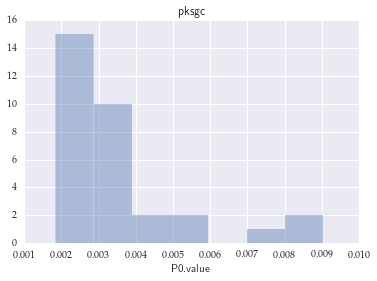

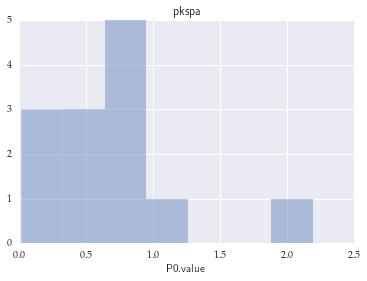

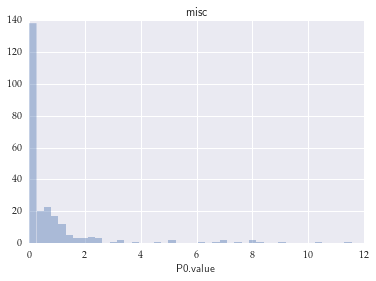

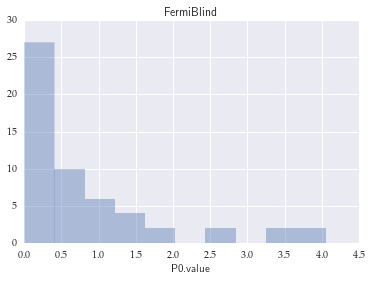

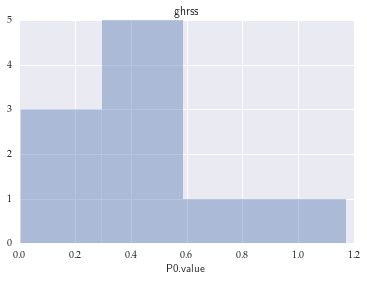

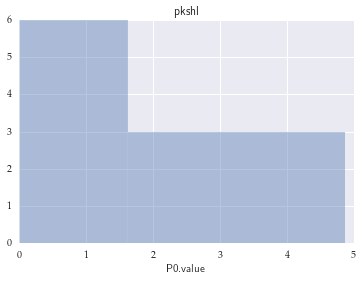

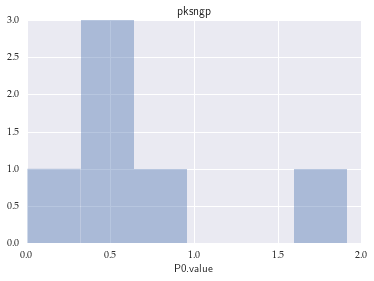

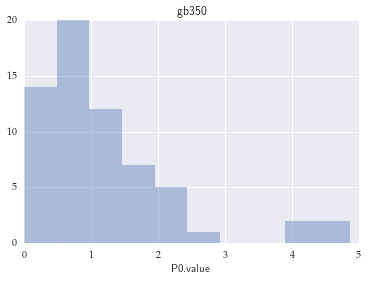

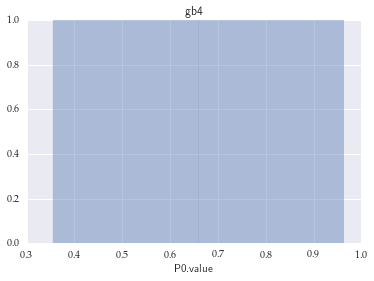

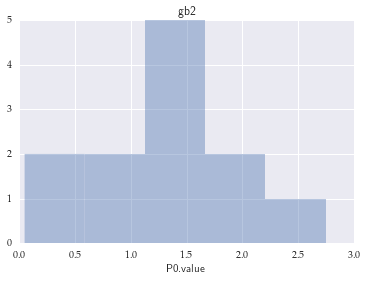

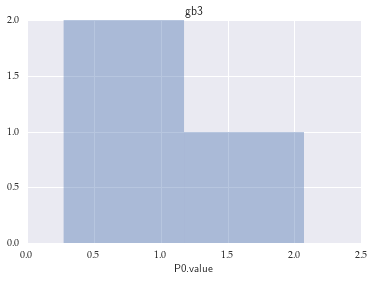

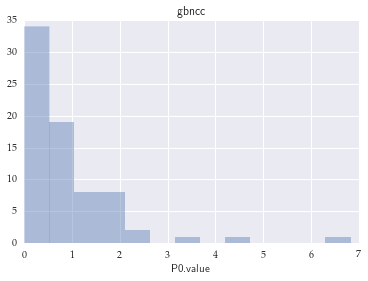

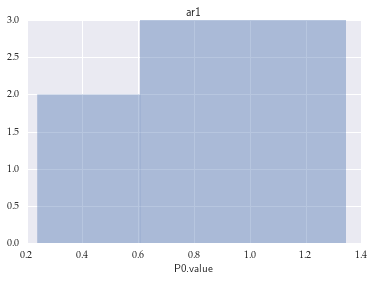

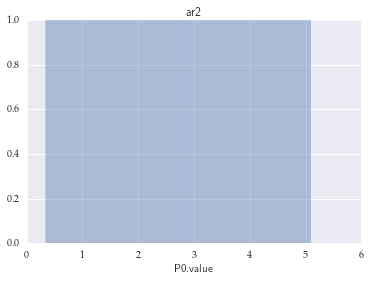

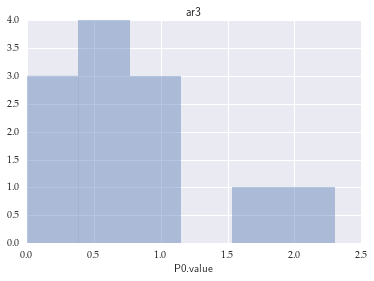

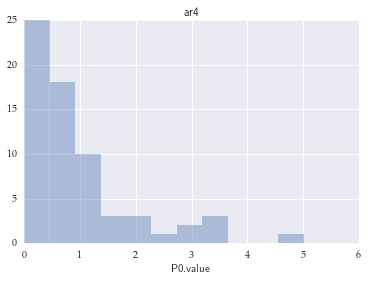

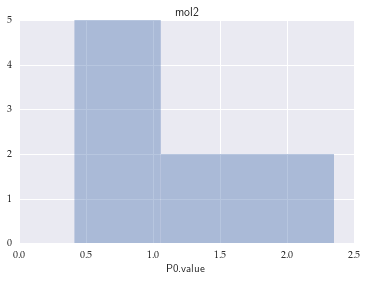

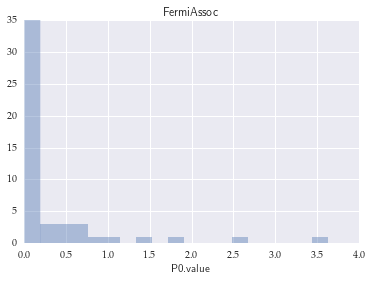

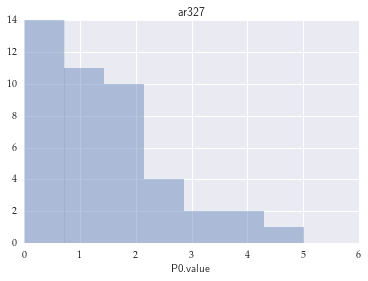

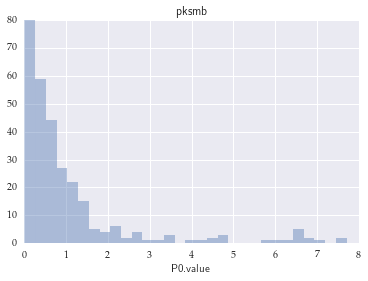

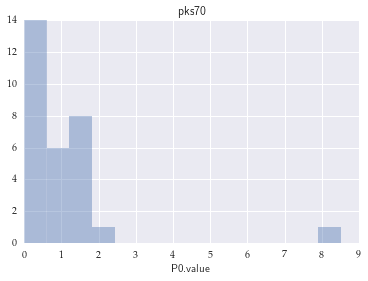

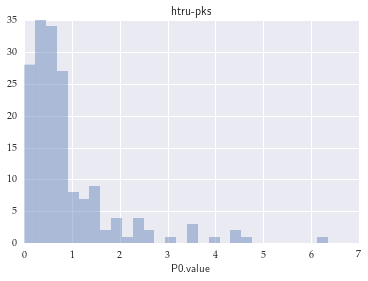

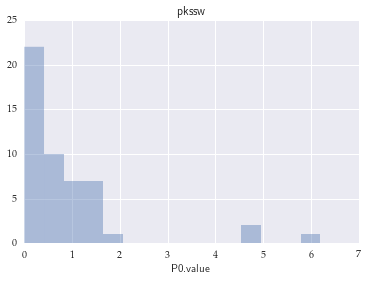

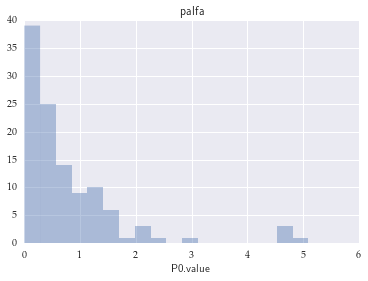

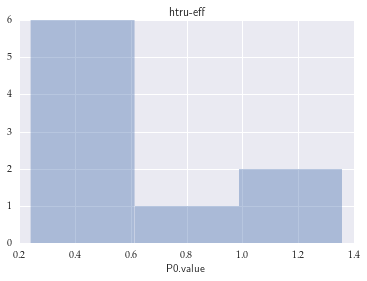

In [172]:
li = 0
for i, srv in enumerate(surveys3):
    vals = pulsarcat_norm_num[pulsarcat_norm_num['SURVEY'].isin([srv])]['P0.value'].dropna()
    if(vals.size <=0):
        continue
    sns.plt.figure(i)
    sns.plt.title(srv.replace('_', '-'))
    sns.distplot(vals,kde=False)
    li = i





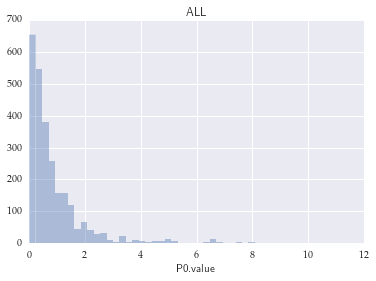

In [173]:
sns.plt.figure(li+1)
sns.plt.title('ALL')
sns.distplot(pulsarcat_norm_num['P0.value'].dropna(),kde=False)

It would seem that many suvey datasets have a bump at the tail which can be interesting to see if it has any physical explanation. 